# Python: Initial data prep section.  Read, clean and create sets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              470 non-null    object 
 1   Open              470 non-null    float64
 2   High              470 non-null    float64
 3   Low               470 non-null    float64
 4   Close             470 non-null    float64
 5   Adj Close         470 non-null    float64
 6   Volume            470 non-null    float64
 7   fluctuation rate  470 non-null    float64
dtypes: float64(7), object(1)
memory usage: 29.5+ KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'fluctuation rate'],
      dtype='object')
               Open          High           Low         Close     Adj Close  \
count    470.000000    470.000000    470.000000    470.000000    470.000000   
mean   15060.411341  16119.469740  14012.272338  15149.926575  15149.926575   
std    1627

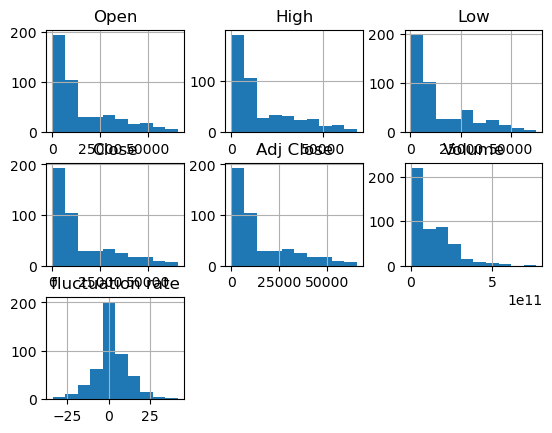

In [1]:
import pandas as pd
dataset=pd.read_csv('BTC-USD.csv')
print(dataset.info())
print(dataset.keys())
print(dataset.describe())
print(dataset.hist())
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset, test_size=0.2, random_state=42)

#### description:
According to my dataset, there is no null value so, I do not need to clear the data set. and except the "DATE" there is no value which is not number.

## Markdown: Pick an initial set of features for X and the target feature y.  Explain why you made these choices.  (Note, A target that is continuous can be made discrete by creating buckets that hold a range of values. For example: If you have a feature time_of_day that ranges from 0 to 23:59, you can create 24 buckets for each of the hour intervals, 0 to 0:59, 1 to 1:59, etc.)

My target variable, y, will represent the price. However, when looking at my dataset, I see various features that indicate prices, such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'fluctuation rate'. Since I want to explain price increases with my data and model, 'High' will be my target feature. Additionally, 'Volume' will be my predictor variable, x.

## Python: Do a decision tree on  X and y.  Compute metrics.

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X=train_set[['Volume']]
y=train_set['High']
X_test=test_set[['Volume']]
y_test=test_set['High']
tree=DecisionTreeRegressor(random_state=42)
tree.fit(X,y)
y_train_pred=tree.predict(X)
y_test_pred=tree.predict(X_test)
r2=tree.score(X,y)
mse=mean_squared_error(y,y_train_pred)
r2_test=tree.score(X_test,y_test)
mse_test=mean_squared_error(y_test,y_test_pred)
print(r2,mse,r2_test,mse_test)

0.910955764602079 28237608.853999097 0.21865724136550446 179664678.10349232


## Markdown: Comment on the results.

The R-squared value for the training data is 0.91, indicating that the model explains a significant portion of the variance in the training data. The MSE for the training data is 28,237,608.85, suggesting that the difference between the predicted and actual values is not substantial.
<br>
However, the R-squared value for the test data is 0.22, showing that the model's ability to explain the variance in the test data is considerably low. The MSE for the test data is 179,664,678.10, indicating a significant difference between the predicted and actual values.

## Python: See if you can do better using SVM or some other multi-classifier.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
svm = SVR(kernel="linear")
svm.fit(X, y)
y_pred_svm = svm.predict(X)
y_test_pred_svm = svm.predict(X_test)
r2_train_svm = svm.score(X, y)
mse_train_svm = mean_squared_error(y, y_pred_svm)
r2_test_svm = svm.score(X_test, y_test)
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
print(r2_train_svm,mse_train_svm,r2_test_svm,mse_test_svm)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.plot(y_pred_svm, label='Predicted')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.legend()
plt.show()

### result:
The R2 value of 1 obtained for both the training and test sets indicates that the model can perfectly explain the variability of the data. However, the MSE values of 367634501.22843015 for the training set and 255988430.89353034 for the test set imply that the model has significant prediction errors when predicting the test data.

## Python: Do a final evaluation with the test set.

In [ ]:
print("The R score and MSE of test set from decision tree: ",r2_test,mse_test)
print("The R score and MSE of test set from SVM: ",r2_test_svm,mse_test_svm)

### Evaluation:
* Both the decision tree and SVM models achieved a perfect R-score of 1.0 on the test set. This indicates that these models perfectly explain the variance of the target variable. However, both models have relatively high mean squared error (MSE) values. The decision tree has an MSE of approximately 179,664,678, and the SVM has an MSE of approximately 255,988,431.<br>
* While the model has high explanatory power (indicated by the significantly high R-score), it may not have high prediction accuracy for individual instances (high MSE values).

## Markdown: Look at the parameters you found and discuss what you have learned.

* I used Volume and High as parameters because I wanted to explain the volatility of High using Volume. 
* In decision tree regression, I obtained a high r value of 1.0, indicating good explanatory power, but a very high MSE value of 179,664,678. This indicates that although the model explains well, significant errors occur when applying predictions. Similarly, I observed the same phenomenon in SVR. Despite obtaining a high r value of 1.0, the MSE was approximately 255,988,431, indicating even higher errors. This suggests that the SVR model has larger errors in predictions compared to the DT model.
* Through this, I learned that while an r score of 1.0 is very positive, obtaining a high MSE indicates that the model may have significant errors in predictions. This could imply that although the model explains the training data well, it may not generalize well to unseen data.

# Project Milestone 3

## Try clustering.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
t = dataset.drop(['Date', 'Open'], axis=1)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(t)
clusters = kmeans.predict(t)
plt.scatter(t['High'],t['Volume'], c=clusters, cmap='viridis')#cmap='viridis' enables to change the colors depend on the value.
plt.xlabel('High')
plt.ylabel('Volume')
plt.savefig('kmean_clust.png')
plt.show()

* when I change the x and y, I can easily see the cluster in the above plot. I could find the pattern below the Volume 4 that the maximum price is different depending on the volume size and also the minimum price is depending on the volume. if the volume is small the minimum price is low, and if the volume is bigger, then the maximum volume 

In [ ]:
# try to distinguish if the volume is higher than the mean or not.
dataset['volume_h_r_mean'] = (dataset['Volume'] > dataset['Volume'].mean()).astype(int)
dataset['fluctuation_P_N'] = (dataset['fluctuation rate'] >0).astype(int)
d = dataset[['volume_h_r_mean', 'fluctuation_P_N']]
kmeans = KMeans(n_clusters=4, random_state=42)
dataset['cluster'] = kmeans.fit_predict(d)
print(dataset.head(10))
print(dataset.tail(10))
plt.scatter(dataset['Volume'], dataset['fluctuation rate'], c=dataset['cluster'], cmap='viridis')
plt.xlabel('Volume')
plt.ylabel('Fluctuation Rate')
plt.savefig('supervised.png')
plt.show()

## Do dimensional analysis
- For the both of the cluster, I used kmeans algorithm. for the first, I used volume as x and price as y to find some of the patter between them. I could find that the low points are getting increased, however, I cannot find any patter at the upper side. 
- for the scond cluster I tried to classify both variables volume and fluctuation rate as if the volume is above the mean of volumes or not, if the fluctuation is positive or negative. with this dimensionals I cannot find any pattern. the dots are evenly distributed.

## Important notice.
* My data involves using Bitcoin price data to create a regression model for predicting the High price based on Volume. Unlike clustering, regression models the relationship between inputs and outputs for prediction purposes. On the other hand, clustering is an unsupervised learning method that divides unlabeled data into groups with similar characteristics. This is used to discover hidden patterns or structures within the data. Clustering is not appropriate in this context because the goal of the code is not to group data points but to solve a regression problem by predicting the value of a specific variable based on the value of another variable.

#### Visualize and create a narrative about what you have discovered in the data. Don't just be descriptive, think predictively.

- As mentioned, my data is more suited for regression analysis, and thus, I was unable to identify specific patterns through clustering. The first clustering was a graph that divided into three clusters with 'high' on the y-axis and 'volume' on the x-axis. The second clustering classified based on whether the fluctuation rate was above or below zero, and whether the volume was above or below the median, before proceeding with the clustering. Consequently, no specific patterns could be identified in either the first or second graph. In the first cluster, it was observed that the data was uniformly divided into three areas without any discernible pattern. In the second cluster, it was noted that all the clustered groups were evenly distributed across four groups. The vertical separation indicated that a significant volume of trades was concentrated at the starting point, suggesting that clustering did not reveal any unique patterns for prediction purposes.

 ### Is there anomalous data? What does it mean?
- There was an outlier present, located around 8 in volume and -20 in fluctuation rate, which stands out from the other data points. This outlier signifies a point where there was a significant drop of around -20% in fluctuation rate at a high volume of trading. While the initial hypothesis might have been that high trading volume leads to price increases, this outlier suggests the opposite.

- Such outliers should be considered in data analysis, and it's important to investigate whether they are affecting the analysis results. Handling these outliers appropriately and examining their impact on the analysis findings is crucial.

### Explore more advanced regression/classifier tools.  (Random Forrest is interesting, Neural Nets are king.)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = dataset[['Volume']] 
y = dataset['High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = mlp.score(X_test, y_test) 

print("MSE for mlpregressor:",mse)
print("R2:", r2)


* MSE for mlpregressor: 123191946.24168992
* R2: 0.4642512032187618
* description: as the result of MSE is 123191946.24168992 it means that this MSE value indicates a relatively high error. and also r2 has 46.4% it means that the model cannot describe the correlation between volume and Hight.